## 统计分布以及随机数生成

**逆变换采样**
wiki[https://zh.wikipedia.org/wiki/%E9%80%86%E5%8F%98%E6%8D%A2%E9%87%87%E6%A0%B7]
本部分介绍如何对特定的分布进行抽样
对于一些特定的分布，python中有现成的函数可以使用。其实，只要知道一个分布的cdf，那么我们都可以自己编写函数实现抽样功能。
假设我们要根据某个概率分布抽样，首先我们可以在一个$U(0,1)$分布随机抽样，然后通过构造$Y=F^{-1}(x)$计算出样本的值。

显然逆变换采样需要目标分布的反函数可以求解。

下面给出解释：
$U(0,1)$分布的cdf为
$$F(x) = P(X\leq x) = x $$

那么对一个随机变量$Y$ ，cdf为
$$G(x) = P(Y\leq y)= $$

1.**均匀分布**
对于给定的区间$[a,b]$上的均匀分布,其pdf为

$$
f(x) = 
\begin{cases} 
\frac{1}{b-a} & \text{for } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$


Text(0.5, 1.0, 'uniform distribution')

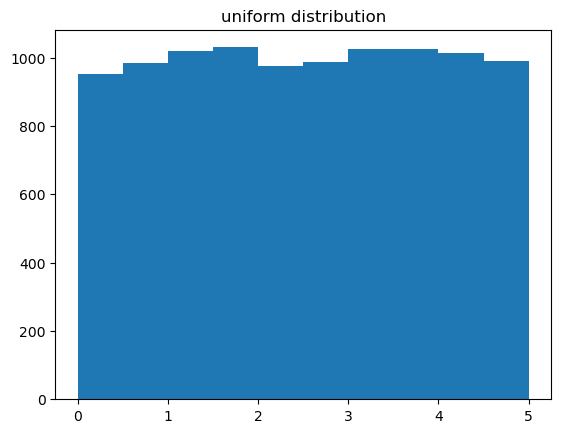

In [11]:
#均匀分布抽样
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

radnom_numbers = np.random.uniform(0,5,10000)
plt.hist(radnom_numbers)
plt.title('uniform distribution')

In [3]:
"""
常见的分布的scipy实现
scipy提供非常多的随机变量
"""
from scipy import stats
#查看所有的连续随机变量
list = [k for k,v in stats.__dict__.items() if isinstance(v,stats.rv_continuous)]
print(list)

['ksone', 'kstwo', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'truncweibull_min', 'weibull_max', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'geninvgauss', 'norminvgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gibrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'moyal', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'loguniform', 'reciprocal', 'rice', 'recipinvgauss', 'semi

现在用指数分布实验一下上面的结论
指数分布的cdf
$$ y = 1-e^{-\lambda x} (x\leq 0)$$
反函数
$$ y = -\frac{ln(1-x)}{\lambda} $$

Text(0.5, 1.0, 'Inverse Transform Sampling')

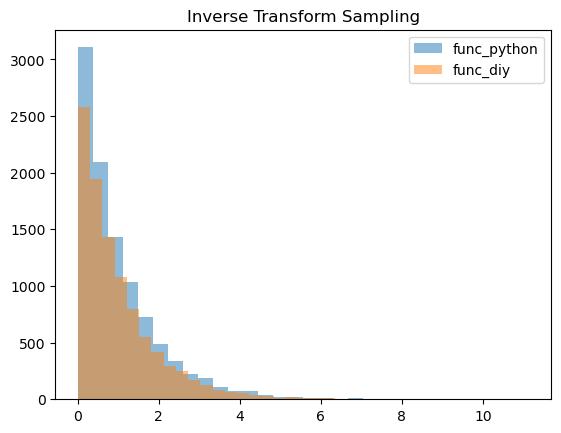

In [16]:
n = 10000 #抽样数量n
lambda_param = 1 #抽样分布的参数
y1 = stats.expon.rvs(scale=1/lambda_param,size=n)

x2 = np.random.uniform(0,1,n)
y2 =  np.log(1-x2)/-lambda_param# 求反函数

plt.hist(y1,label='func_python',alpha=0.5,bins=30)
plt.hist(y2,label='func_diy',alpha=0.5,bins=30)
plt.legend()
plt.title('Inverse Transform Sampling')

**Box-Muller方法**对正太分布进行采样


## Bootstrap

估计参数的标准误。在统计中，我们有

In [21]:
import pandas as pd
y=pd.DataFrame({'a':[1,2,1,2,1]})

In [24]:
probs = y.value_counts()

In [30]:
y[y.columns[0]].unique()

array([1, 2], dtype=int64)

In [32]:
y[y.columns[0]]

0    1
1    2
2    1
3    2
4    1
Name: a, dtype: int64